In [1]:
# for some reason, really slow reading in csv file??
dat <- read.csv('data/2013-09 - Citi Bike trip data.csv',header=TRUE)#nrows=700000

In [2]:
head(dat)

tripduration,starttime,stoptime,start.station.id,start.station.name,start.station.latitude,start.station.longitude,end.station.id,end.station.name,end.station.latitude,end.station.longitude,bikeid,usertype,birth.year,gender
1010,2013-09-01 00:00:02,2013-09-01 00:16:52,254,W 11 St & 6 Ave,40.73532,-73.99800,147,Greenwich St & Warren St,40.71542,-74.01122,15014,Subscriber,1974,1
1443,2013-09-01 00:00:09,2013-09-01 00:24:12,151,Cleveland Pl & Spring St,40.72182,-73.99720,497,E 17 St & Broadway,40.73705,-73.99009,19393,Customer,\N,0
1387,2013-09-01 00:00:16,2013-09-01 00:23:23,352,W 56 St & 6 Ave,40.76341,-73.97722,405,Washington St & Gansevoort St,40.73932,-74.00812,16160,Subscriber,1992,1
405,2013-09-01 00:00:18,2013-09-01 00:07:03,490,8 Ave & W 33 St,40.75155,-73.99393,459,W 20 St & 11 Ave,40.74674,-74.00776,14997,Subscriber,1973,1
270,2013-09-01 00:00:20,2013-09-01 00:04:50,236,St Marks Pl & 2 Ave,40.72842,-73.98714,393,E 5 St & Avenue C,40.72299,-73.97995,19609,Subscriber,1984,1
400,2013-09-01 00:00:35,2013-09-01 00:07:15,490,8 Ave & W 33 St,40.75155,-73.99393,453,W 22 St & 8 Ave,40.74475,-73.99915,17523,Subscriber,1978,1


In [3]:
str(dat)

'data.frame':	1034359 obs. of  15 variables:
 $ tripduration           : int  1010 1443 1387 405 270 400 115 1080 2550 1108 ...
 $ starttime              : Factor w/ 768843 levels "2013-09-01 00:00:02",..: 1 2 3 4 5 6 7 8 9 9 ...
 $ stoptime               : Factor w/ 771951 levels "2013-09-01 00:02:42",..: 46 97 86 5 3 6 1 58 252 60 ...
 $ start.station.id       : int  254 151 352 490 236 490 351 2000 533 301 ...
 $ start.station.name     : Factor w/ 330 levels "1 Ave & E 15 St",..: 262 76 309 18 253 18 161 162 53 109 ...
 $ start.station.latitude : num  40.7 40.7 40.8 40.8 40.7 ...
 $ start.station.longitude: num  -74 -74 -74 -74 -74 ...
 $ end.station.id         : int  147 497 405 459 393 453 351 418 2021 306 ...
 $ end.station.name       : Factor w/ 330 levels "1 Ave & E 15 St",..: 176 106 320 271 136 276 161 160 297 77 ...
 $ end.station.latitude   : num  40.7 40.7 40.7 40.7 40.7 ...
 $ end.station.longitude  : num  -74 -74 -74 -74 -74 ...
 $ bikeid                 : int  15014 193

In [4]:
dat$starttime <- as.POSIXct(dat$starttime)
dat$stoptime <- as.POSIXct(dat$stoptime)


In [5]:
str(dat)

'data.frame':	1034359 obs. of  15 variables:
 $ tripduration           : int  1010 1443 1387 405 270 400 115 1080 2550 1108 ...
 $ starttime              : POSIXct, format: "2013-09-01 00:00:02" "2013-09-01 00:00:09" ...
 $ stoptime               : POSIXct, format: "2013-09-01 00:16:52" "2013-09-01 00:24:12" ...
 $ start.station.id       : int  254 151 352 490 236 490 351 2000 533 301 ...
 $ start.station.name     : Factor w/ 330 levels "1 Ave & E 15 St",..: 262 76 309 18 253 18 161 162 53 109 ...
 $ start.station.latitude : num  40.7 40.7 40.8 40.8 40.7 ...
 $ start.station.longitude: num  -74 -74 -74 -74 -74 ...
 $ end.station.id         : int  147 497 405 459 393 453 351 418 2021 306 ...
 $ end.station.name       : Factor w/ 330 levels "1 Ave & E 15 St",..: 176 106 320 271 136 276 161 160 297 77 ...
 $ end.station.latitude   : num  40.7 40.7 40.7 40.7 40.7 ...
 $ end.station.longitude  : num  -74 -74 -74 -74 -74 ...
 $ bikeid                 : int  15014 19393 16160 14997 19609 1752

In [6]:
# add yearday variable
library(lubridate)
dat$yday <- yday(dat$starttime)
head(dat)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



tripduration,starttime,stoptime,start.station.id,start.station.name,start.station.latitude,start.station.longitude,end.station.id,end.station.name,end.station.latitude,end.station.longitude,bikeid,usertype,birth.year,gender,yday
1010,2013-09-01 00:00:02,2013-09-01 00:16:52,254,W 11 St & 6 Ave,40.73532,-73.99800,147,Greenwich St & Warren St,40.71542,-74.01122,15014,Subscriber,1974,1,244
1443,2013-09-01 00:00:09,2013-09-01 00:24:12,151,Cleveland Pl & Spring St,40.72182,-73.99720,497,E 17 St & Broadway,40.73705,-73.99009,19393,Customer,\N,0,244
1387,2013-09-01 00:00:16,2013-09-01 00:23:23,352,W 56 St & 6 Ave,40.76341,-73.97722,405,Washington St & Gansevoort St,40.73932,-74.00812,16160,Subscriber,1992,1,244
405,2013-09-01 00:00:18,2013-09-01 00:07:03,490,8 Ave & W 33 St,40.75155,-73.99393,459,W 20 St & 11 Ave,40.74674,-74.00776,14997,Subscriber,1973,1,244
270,2013-09-01 00:00:20,2013-09-01 00:04:50,236,St Marks Pl & 2 Ave,40.72842,-73.98714,393,E 5 St & Avenue C,40.72299,-73.97995,19609,Subscriber,1984,1,244
400,2013-09-01 00:00:35,2013-09-01 00:07:15,490,8 Ave & W 33 St,40.75155,-73.99393,453,W 22 St & 8 Ave,40.74475,-73.99915,17523,Subscriber,1978,1,244


In [7]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [8]:
# calculate nubmer of rides per day
dat %>% group_by(yday) %>% tally() %>% arrange(desc(n))

yday,n
263,39382
262,39200
267,38417
260,38283
268,38223
269,38189
261,37957
270,37412
273,37148
253,36954


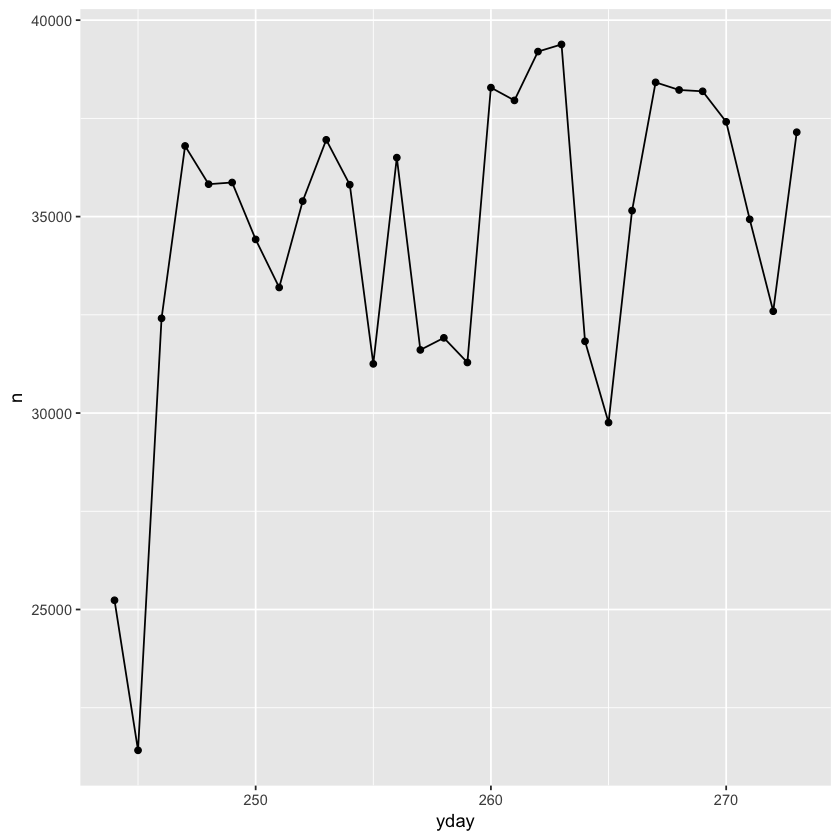

In [9]:
library(ggplot2)
dat %>% group_by(yday) %>% tally() %>%
ggplot( aes(x=yday,y=n)) +
geom_point()+
geom_line()

Plot number of rides by day of week


In [24]:
dat$day_of_week <- lubridate::wday(dat$starttime)
#head(dat)

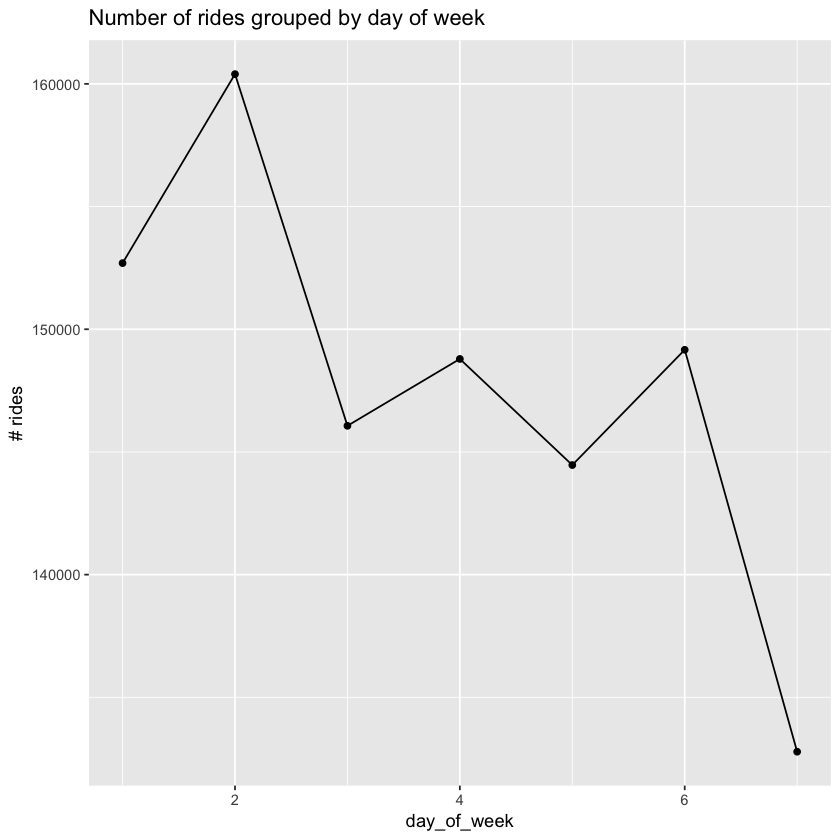

In [23]:
dat %>% group_by(day_of_week) %>% tally() %>%
ggplot( aes(x=day_of_week,y=n)) +
geom_point()+
geom_line() +
ggtitle('Number of rides grouped by day of week')+
ylab('# rides')

In [18]:
dat %>% group_by(day_of_week) %>% tally()

day_of_week,n
1,152695
2,160397
3,146065
4,148790
5,144466
6,149163
7,132783
